# **Visium colon ct-Harreman DestVI DE downstream analysis**

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from plotnine import *
import random
from statsmodels.stats.multitest import multipletests

BASE_PATH = "/home/projects/nyosef/oier/Harreman_files/Visium_colon"
ADATA_PATH = os.path.join(BASE_PATH, 'h5ads')
DATA_PATH = os.path.join(BASE_PATH, 'data')
PLOTS_PATH = os.path.join(BASE_PATH, 'plots')

In [2]:
# file = pd.read_excel(os.path.join(DATA_PATH, "Visium_colon_sig_high_vs_low_DE_analysis.xlsx"), sheet_name=None, index_col=0)
# file = pd.read_excel(os.path.join(DATA_PATH, "Vitamin_A_Visium_colon_ct_Harreman_no_deconv_DestVI_DE_results.xlsx"), sheet_name=None, index_col=0)
file = pd.read_excel(os.path.join(DATA_PATH, "Granulocytes_Visium_colon_ct_Harreman_no_deconv_DestVI_DE_results.xlsx"), sheet_name=None, index_col=0)

In [3]:
lfc_df = pd.DataFrame(data={'Vitamin A': file['Vitamin A']['log2FC'],
                         'Lysophosphatidylcholine': file['Lysophosphatidylcholine']['log2FC']})

padj_df = pd.DataFrame(data={'Vitamin A': file['Vitamin A']['adj_pval'],
                         'Lysophosphatidylcholine': file['Lysophosphatidylcholine']['adj_pval']})

In [4]:
alpha = 0.05

sig1 = padj_df.iloc[:, 0] < alpha
sig2 = padj_df.iloc[:, 1] < alpha

# LogFC values
lfc1 = lfc_df.iloc[:, 0]
lfc2 = lfc_df.iloc[:, 1]

categories = [
    sig1 & sig2 & (lfc1 > 0) & (lfc2 > 0),
    sig1 & sig2 & (lfc1 < 0) & (lfc2 < 0),
    sig1 & (lfc1 > 0) & (lfc2 < 0),
    (lfc1 < 0) & sig2 & (lfc2 > 0),
]
choices = [
    'positive_both',
    'negative_both',
    'Vitamin A',
    'Lysophosphatidylcholine'
]

lfc_df['significance'] = np.select(categories, choices, default='None')

lfc_df['significance'] = pd.Categorical(
    lfc_df['significance'], categories=['None', 'Vitamin A', 'Lysophosphatidylcholine', 'positive_both', 'negative_both'], ordered=True
)

In [7]:
for sig_group in lfc_df['significance'].unique():
    if sig_group == 'None':
        continue
    print(sig_group)
    print(', '.join(lfc_df[lfc_df['significance'] == sig_group].index.tolist()))

negative_both
0610040F04Rik, 1700016D06Rik, 1700034P13Rik, 1700042O10Rik, 9030622O22Rik, 9130410C08Rik, A1cf, Actn1, Adgrg7, Arhgef28, Atp5o, B4galnt2, B4galnt3, Btnl4, Camkmt, Cyp4f40, Dhrs11, Dpf3, Exph5, Fam120c, Fbxo47, Gm12002, Gm13481, Gm15929, Gm16083, Gm16341, Gm21847, Gm26714, Gm28588, Gm3054, Gm30613, Gm37240, Gsta1, Gstp1, Gstp2, Hist1h3e, Hnf4g, Hs6st3, Il22ra1, Il31ra, Klf12, Lrrc4, Ly6g6d, Mctp1, Mmp28, Ms4a12, Myo3a, Nlrp4e, Nos1ap, Pawr, Pde11a, Pde4d, Plcxd3, Plet1os, Plp2, Ppara, Prelid2, Pstpip2, Ptprn2, Reg3b, Rhbdl2, Schip1, Srd5a2, St8sia3os, Sytl5, Themis3, Trim38, Ubash3a, Vgll4, Wwox, Xlr5a, Zfp536, mt-Nd4l
Lysophosphatidylcholine
1200007C13Rik, 2310079G19Rik, 2810407A14Rik, 4732465J04Rik, AW011738, Adrb1, Amer2, Aqp8, Arg2, Bcl2a1a, Bcl2a1b, Bcl2a1d, Cass4, Ccl24, Cd14, Cd33, Clec4b1, Clec4d, Clec4e, Clec4n, Cmss1, Csf1, Ctla2b, Dcn, Dusp1, Fam71a, Fcer1g, Fcgr3, Fos, Fosb, Gm10134, Gm11290, Gm15729, Gm16233, Gm17268, Gm21859, Gm26802, Gm42418, Gm43661, Gm4393

In [15]:
both_up = ['Cxcl2', 'Hp', 'Retnlg', 'S100a8', 'S100a9', 'Slpi']
both_down = ['Ly6g6d', 'Pstpip2', 'Trim38', 'Gstp1', 'Gsta1', 'Pde4d', 'Actn1']
Lysophosphatidylcholine_up = ['Il1b', 'Nlrp3', 'Trem1', 'Fcgr3', 'Tyrobp', 'Jun', 'Fos']
Vitamin_A_up = ['Anxa1', 'Camp', 'Cd177', 'Cybb', 'Lcn2', 'Ltf', 'Mpo', 'Nos2', 'Prtn3']

In [16]:
selected_genes = list(set(both_up) | set(both_down) | set(Lysophosphatidylcholine_up) | set(Vitamin_A_up))

In [17]:
lfc_df['delabel'] = lfc_df.index.to_series().where(lfc_df.index.isin(selected_genes))

In [18]:
df_unlabeled = lfc_df[lfc_df['significance'] == 'None']
df_labeled = lfc_df[(lfc_df['significance'] != 'None') & (~lfc_df['significance'].isin(['negative_both', 'positive_both']))]
df_both = lfc_df[lfc_df['significance'].isin(['negative_both', 'positive_both'])]

In [23]:
print('\n'.join(df_labeled['delabel'].dropna().tolist()))

Anxa1
Camp
Cd177
Cybb
Fcgr3
Fos
Il1b
Jun
Lcn2
Ltf
Mpo
Nlrp3
Nos2
Prtn3
Trem1
Tyrobp


In [20]:
palette = {
    'None': '#BDBDBD',
    'Vitamin A': '#FC9272',
    'Lysophosphatidylcholine': '#BCBDDC',
    # 'opposite': "#74C476",
    'negative_both': "#08519C",
    'positive_both': "#A50F15",
}

/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 8 x 5 in image.
/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /home/projects/nyosef/oier/Harreman_files/Visium_colon/plots/Vitamin_A_Lysophosphatidylcholine_Granulocytes_DE_analysis_volcano_plot.pdf
/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 127 rows containing missing values.
/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 73 rows containing missing values.
/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 127 rows containing missing values.
/home/projects/nyosef/oier/mambaforg

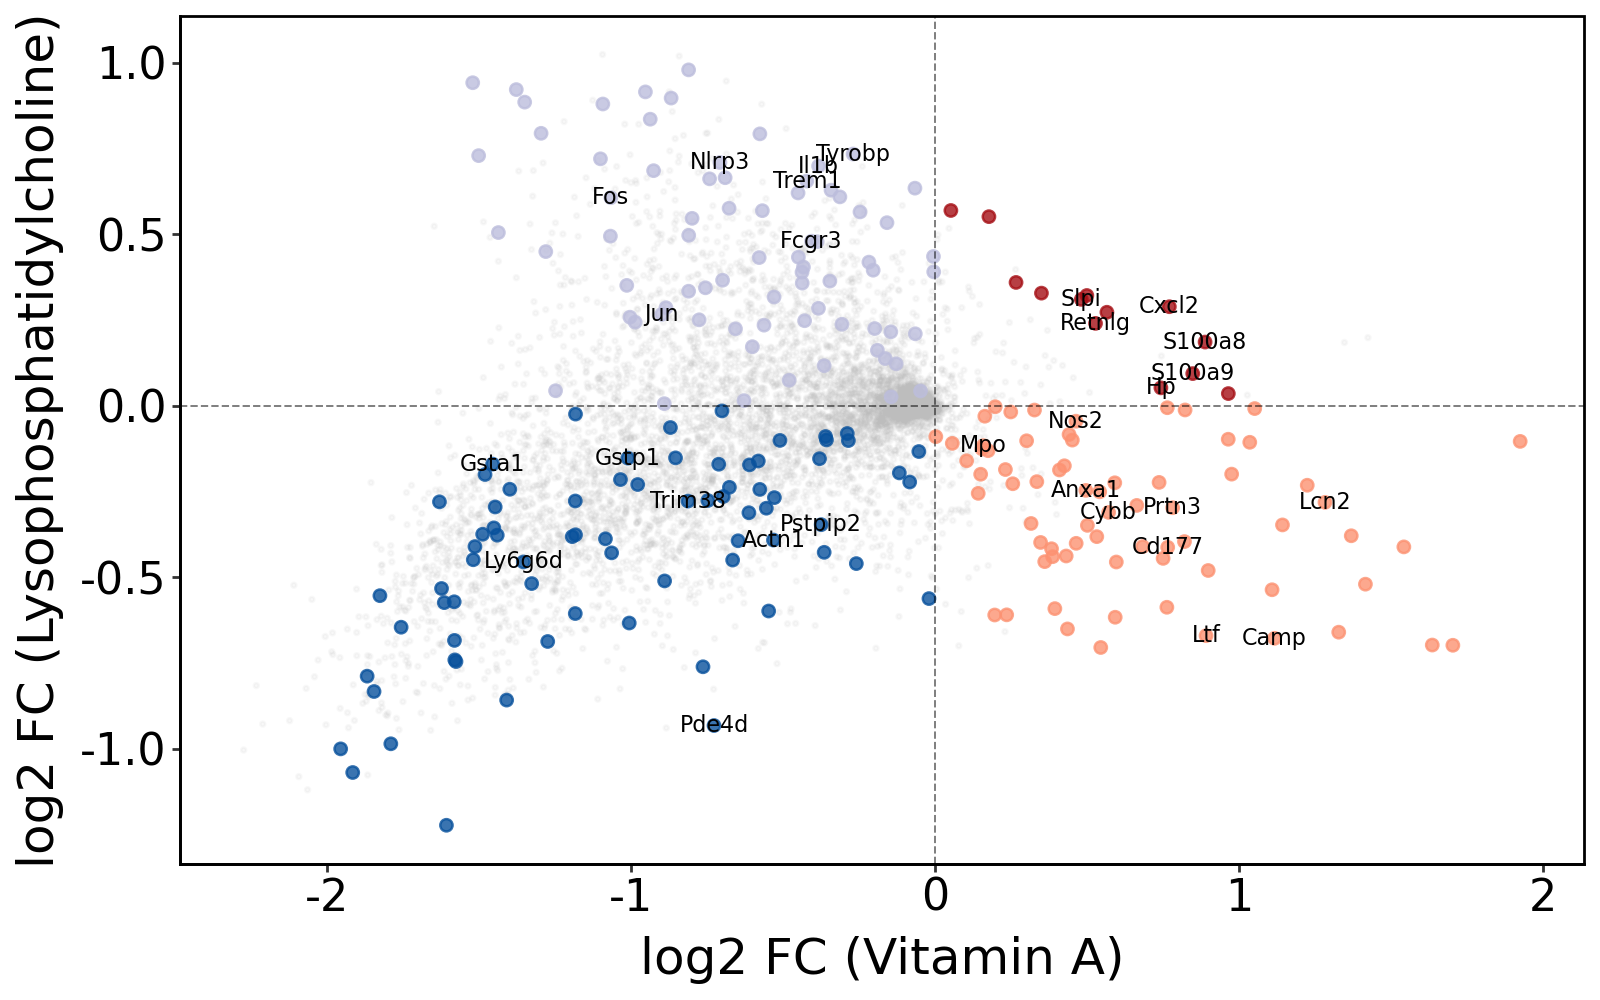

In [22]:
fig = (
    ggplot() +
    geom_point(df_unlabeled, aes(x='Vitamin A', y='Lysophosphatidylcholine', color='significance'), size=0.5, alpha=0.1) +
    geom_point(df_labeled, aes(x='Vitamin A', y='Lysophosphatidylcholine', color='significance'), size=2, alpha=0.8) +
    geom_text(df_labeled, aes(x='Vitamin A', y='Lysophosphatidylcholine', label='delabel'), color='black', size=8) +
    geom_point(df_both, aes(x='Vitamin A', y='Lysophosphatidylcholine', color='significance'), size=2, alpha=0.8) +
    geom_text(df_both, aes(x='Vitamin A', y='Lysophosphatidylcholine', label='delabel'), color='black', size=8) +
    # Aesthetics
    theme_classic() +
    geom_hline(yintercept=0, linetype='--', color='black', alpha=0.5, size=0.4) +
    geom_vline(xintercept=0, linetype='--', color='black', alpha=0.5, size=0.4) +
    scale_color_manual(values=palette) +
    # ggtitle('Vitamin A (Granulocytes)') +
    xlab("log2 FC (Vitamin A)") + ylab("log2 FC (Lysophosphatidylcholine)") +
    theme(
        plot_title=element_text(hjust=0.5),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_rect(colour="black"),
        legend_position='none',
        axis_text_x=element_text(size=16, color='black'),
        axis_text_y=element_text(size=16, color='black'),
        axis_title_x=element_text(size=18),
        axis_title_y=element_text(size=18),
        figure_size=(8, 5)
    )
)
fig.save(os.path.join(PLOTS_PATH, 'Vitamin_A_Lysophosphatidylcholine_Granulocytes_DE_analysis_volcano_plot.pdf'))
fig